In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score
from keras.models import Sequential
from sklearn.metrics import mean_absolute_error, r2_score
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates




In [2]:
import numpy as np
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [4]:
dataset = pd.read_csv("/content/drive/MyDrive/colab/crypto_dataset/BTC-USD.csv")
dataset.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
dataset.shape

(2491, 7)

In [ ]:
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
dataset.info(memory_usage = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2491 entries, 0 to 2490
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2491 non-null   object 
 1   Open       2491 non-null   float64
 2   High       2491 non-null   float64
 3   Low        2491 non-null   float64
 4   Close      2491 non-null   float64
 5   Adj Close  2491 non-null   float64
 6   Volume     2491 non-null   int64  
dtypes: float64(5), int64(1), object(1)

In [ ]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.set_index('Date', inplace=True)
dataset.fillna(method='ffill', inplace=True)
dataset['target'] = dataset['Close'].shift(-1)
dataset.dropna(inplace=True)


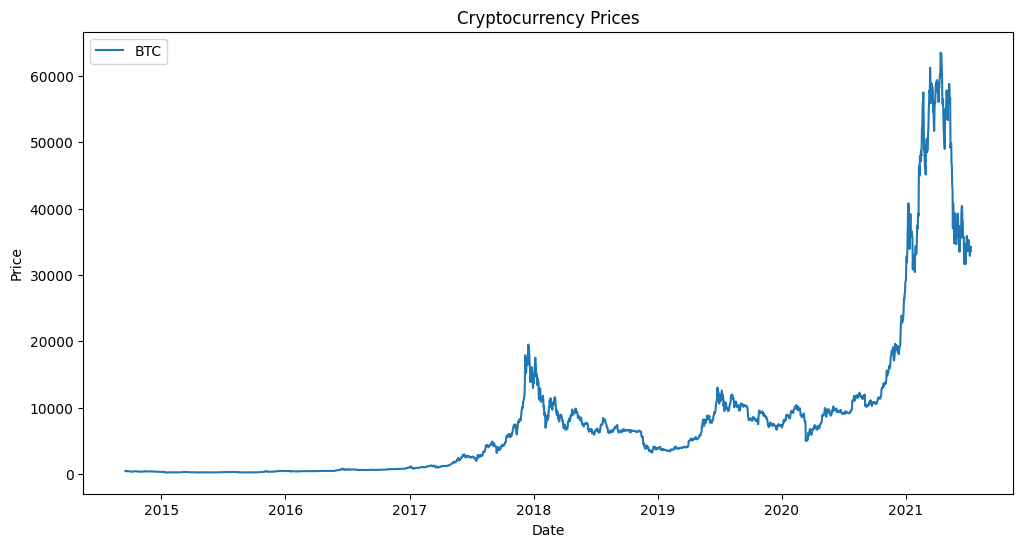

In [ ]:

fig, ax = plt.subplots(figsize=(12, 6))


ax.plot(dataset.index, dataset['Close'], label='BTC')
ax.set_title('Cryptocurrency Prices')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

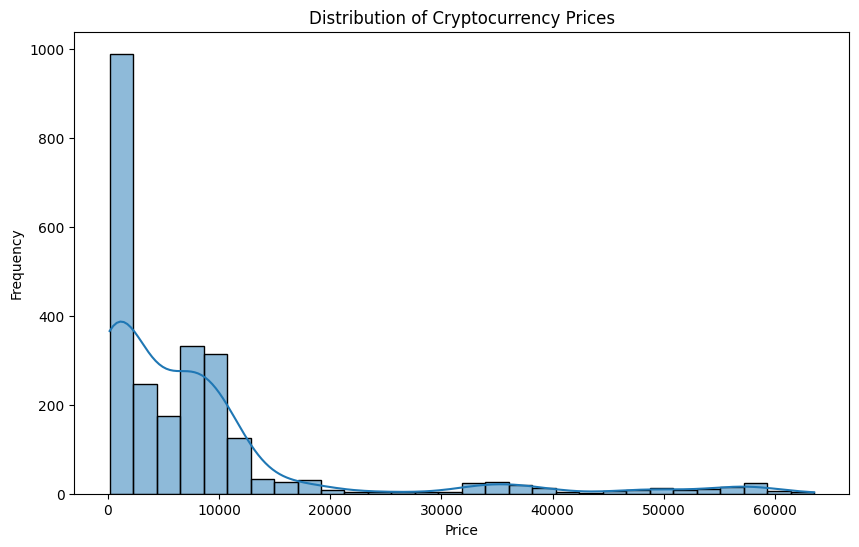

In [ ]:
plt.figure(figsize=(10, 6))

sns.histplot(data=dataset, x='Close', bins=30, kde=True)

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Cryptocurrency Prices')
plt.show()


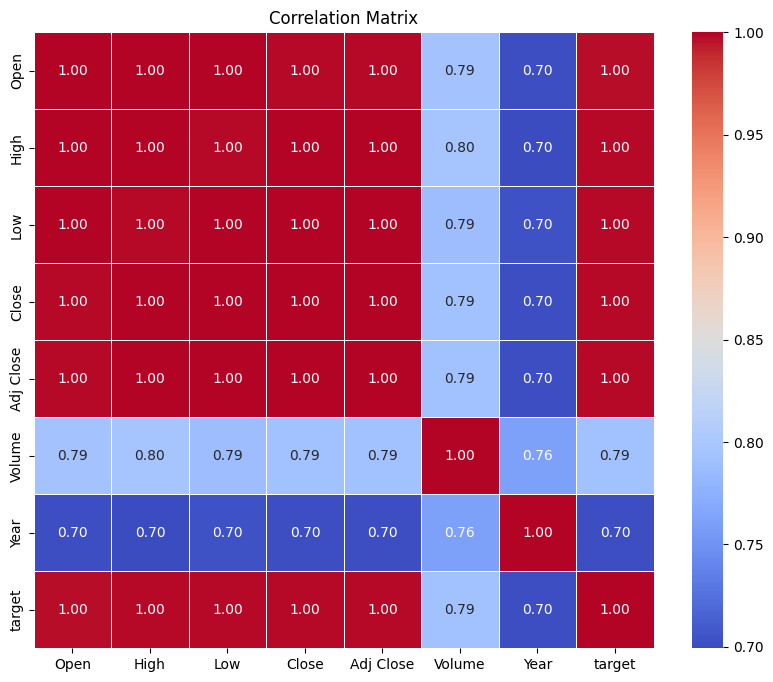

In [ ]:
corr_matrix = dataset.corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
total_columns = dataset.columns
# store numerical and categorical column in two different variables. It comes handy during visualizaion.
num_col = dataset._get_numeric_data().columns
cat_col = list(set(total_columns)-set(num_col))

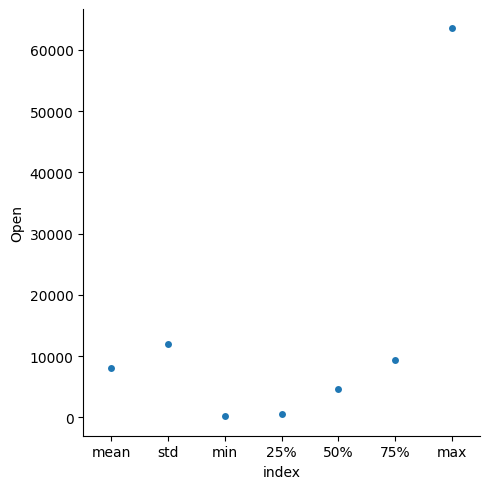

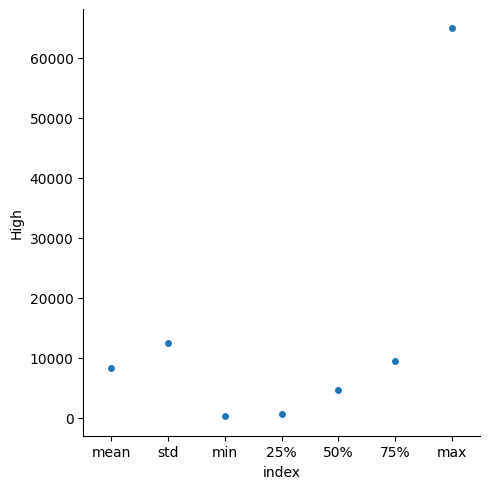

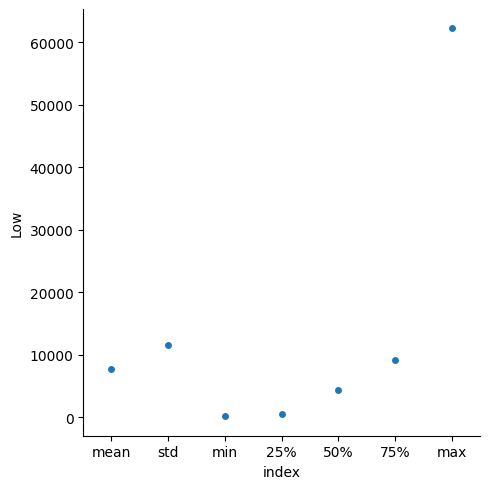

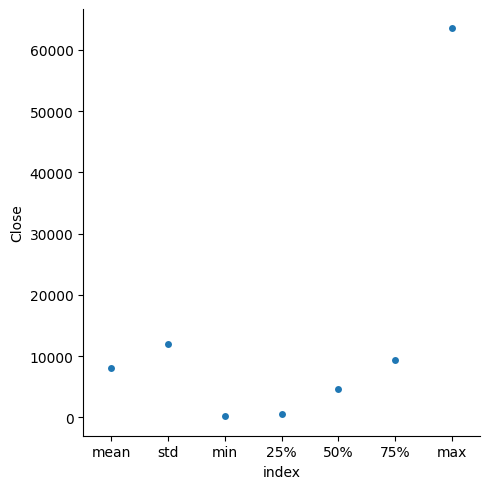

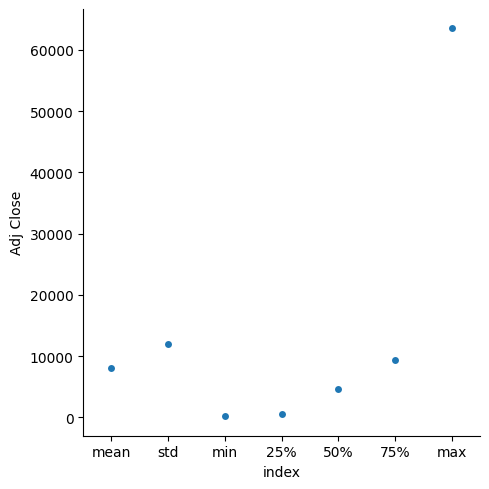

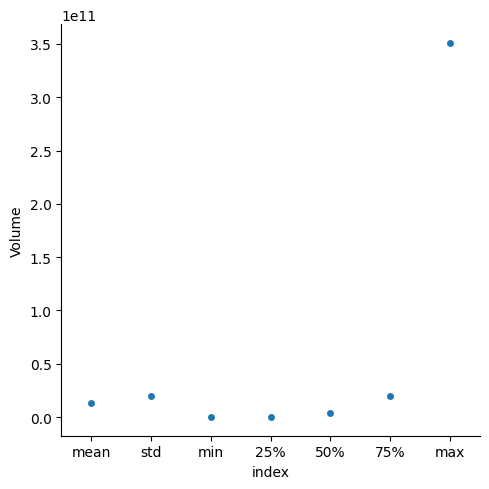

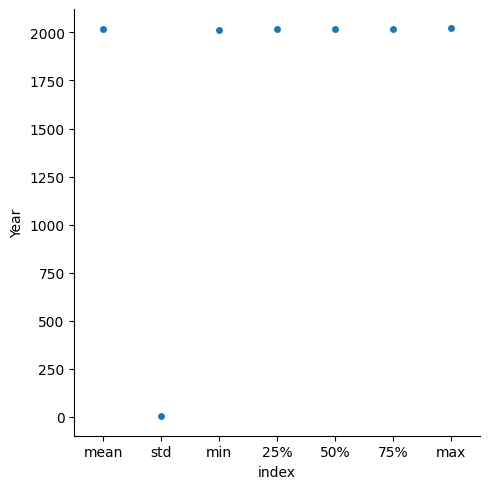

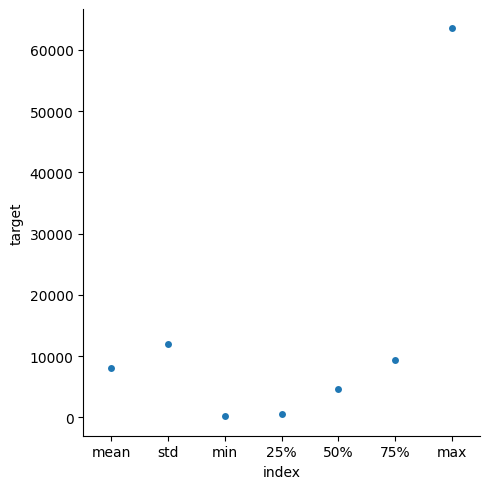

In [ ]:
describe_num_df = dataset.describe()
describe_num_df.reset_index(inplace=True)
# To remove any variable from plot
describe_num_df = describe_num_df[describe_num_df['index'] != 'count']
for i in num_col:
  if i in ['index']:
    continue
  sns.catplot(x='index', y=i, data=describe_num_df)
  plt.show()

In [ ]:
def create_lagged_features(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset[['Close']])

X_ann, y_ann = create_lagged_features(scaled_data, look_back=30)

X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(X_ann, y_ann, test_size=0.3, shuffle=False)




In [ ]:
#Defining ANN model

model = Sequential()
model.add(Dense(50, input_dim=30, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 50)                1550      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train_ann, y_train_ann, epochs=5, batch_size=32,
          validation_split =0.2, verbose=1,
          validation_data= (X_test_ann,y_test_ann))

Epoch 1/5
54/54 [==============================] - 1s 5ms/step - loss: 2.5007e-04 - val_loss: 0.0034
Epoch 2/5
54/54 [==============================] - 0s 3ms/step - loss: 1.1229e-04 - val_loss: 0.0014
Epoch 3/5
54/54 [==============================] - 0s 3ms/step - loss: 8.0599e-05 - val_loss: 0.0020
Epoch 4/5
54/54 [==============================] - 0s 3ms/step - loss: 6.0281e-05 - val_loss: 9.2575e-04
Epoch 5/5
54/54 [==============================] - 0s 3ms/step - loss: 5.2759e-05 - val_loss: 8.5676e-04


In [ ]:
# Make predictions

ann_predictions = model.predict(X_test_ann)
ann_predictions = scaler.inverse_transform(ann_predictions)
mse = mean_squared_error(y_test_ann, ann_predictions)
ann_rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_ann, ann_predictions)
r2 = r2_score(y_test_ann,ann_predictions)
print(f"ANN Model RMSE: {rmse}")
print(f"ANN Model MAE: {mae}")
print(f"ANN Model R-squared: {r2}")


24/24 [==============================] - 0s 6ms/step
ANN Model RMSE: 24888.226633954473
ANN Model MAE: 19108.185090570278
ANN Model R-squared: -9223774964.473509


In [ ]:
y_test_ann_actual = scaler.inverse_transform(y_test_ann.reshape(-1, 1))
dates_test = dataset.index[-len(y_test_ann_actual):]

sorted_ann_data = pd.DataFrame({'Date': dates_test, 'Actual': y_test_ann_actual.flatten()})
sorted_ann_data.set_index('Date', inplace=True)
sorted_ann_data.sort_index(inplace=True)


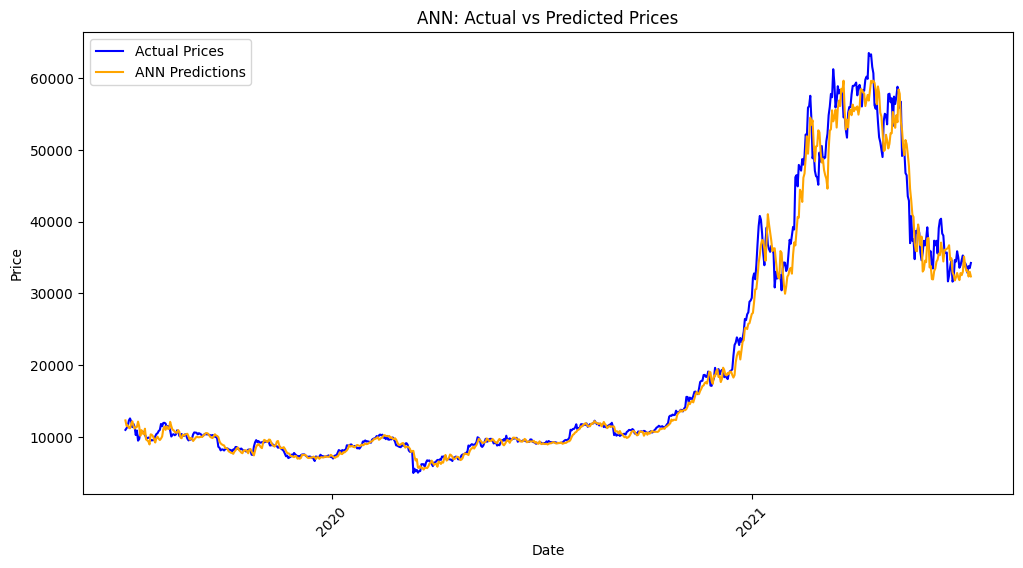

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(x=sorted_ann_data.index, y=sorted_ann_data['Actual'], label='Actual Prices', color='blue', ax=ax)
sns.lineplot(x=dates_test, y=ann_predictions.flatten(), label='ANN Predictions', color='orange', ax=ax)

ax.set_title('ANN: Actual vs Predicted Prices')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.show()


In [ ]:
X_lstm, y_lstm = create_lagged_features(scaled_data, look_back=30)

X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_lstm, test_size=0.2, shuffle=False)


In [ ]:
X_train_lstm = np.reshape(X_train_lstm, (X_train_lstm.shape[0], X_train_lstm.shape[1], 1))
X_test_lstm = np.reshape(X_test_lstm, (X_test_lstm.shape[0], X_test_lstm.shape[1], 1))


In [ ]:
# Define the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(30, 1)))
model_lstm.add(Dense(1))

# Compile the model
model_lstm.compile(loss='mean_squared_error', optimizer='adam')




In [ ]:
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=5, batch_size=32,
          validation_split =0.2, verbose=1,
          validation_data= (X_test_lstm,y_test_lstm))

Epoch 1/5
62/62 [==============================] - 5s 34ms/step - loss: 9.9885e-04 - val_loss: 0.0024
Epoch 2/5
62/62 [==============================] - 2s 30ms/step - loss: 1.0570e-04 - val_loss: 0.0020
Epoch 3/5
62/62 [==============================] - 2s 27ms/step - loss: 9.1319e-05 - val_loss: 0.0018
Epoch 4/5
62/62 [==============================] - 2s 28ms/step - loss: 8.2251e-05 - val_loss: 0.0017
Epoch 5/5
62/62 [==============================] - 1s 23ms/step - loss: 7.5167e-05 - val_loss: 0.0020


In [ ]:
# Make predictions
lstm_predictions = model_lstm.predict(X_test_lstm)

# Inverse scale the predictions
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Calculate the accuracy
lstm_mse = mean_squared_error(y_test_lstm, lstm_predictions)
lstm_rmse = np.sqrt(lstm_mse)
lstm_mae = mean_absolute_error(y_test_lstm, lstm_predictions)
lstm_r2 = r2_score(y_test_lstm,lstm_predictions)
print(f"LSTM Model RMSE: {lstm_rmse}")
print(f"LSTM Model MAE: {lstm_mae}")
print(f"LSTM Model R-squared: {lstm_r2}")

16/16 [==============================] - 1s 6ms/step
LSTM Model RMSE: 28844.883917079384
LSTM Model MAE: 23639.363662400625
LSTM Model R-squared: -10364446750.820652


In [ ]:
y_test_lstm_actual = scaler.inverse_transform(y_test_lstm.reshape(-1, 1))

dates_test_lstm = dataset.index[-len(y_test_lstm_actual):]

sorted_lstm_data = pd.DataFrame({'Date': dates_test_lstm, 'Actual': y_test_lstm_actual.flatten()})
sorted_lstm_data.set_index('Date', inplace=True)
sorted_lstm_data.sort_index(inplace=True)



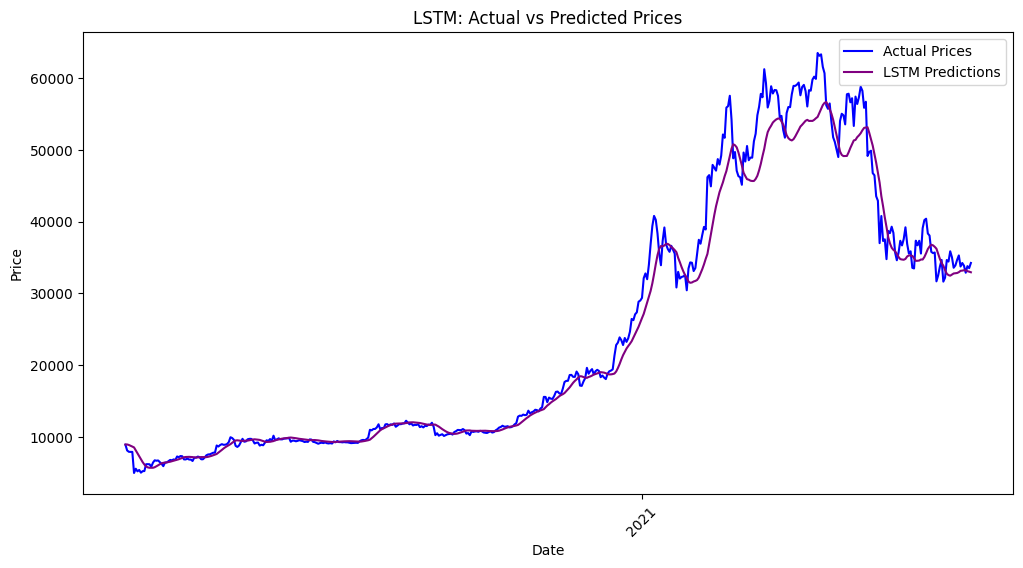

In [ ]:

fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(x=sorted_lstm_data.index, y=sorted_lstm_data['Actual'], label='Actual Prices', color='blue', ax=ax)
sns.lineplot(x=dates_test_lstm, y=lstm_predictions.flatten(), label='LSTM Predictions', color='purple', ax=ax)

ax.set_title('LSTM: Actual vs Predicted Prices')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.show()

In [ ]:
def sort_test_data_by_date(dates_test, y_test, predictions):
    predictions = predictions.reshape(-1) if predictions.ndim > 1 else predictions
    test_data = pd.DataFrame({'Actual': y_test.flatten(), 'Predictions': predictions.flatten()}, index=dates_test)
    test_data.sort_index(inplace=True)
    return test_data


In [ ]:
X_rf, y_rf = create_lagged_features(scaled_data, look_back=30)

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.3, shuffle=False)

In [ ]:
sorted_rf_data = sort_test_data_by_date(dates_test, y_test_rf, rf_predictions)
dates_test = dataset.index[-len(y_test_rf):]


In [ ]:

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train_rf, y_train_rf)

RandomForestRegressor(random_state=42)

In [ ]:
rf_predictions = rf_model.predict(X_test_rf)
rf_mse = mean_squared_error(y_test_ann, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test_rf, rf_predictions)
rf_r2 = r2_score(y_test_rf,rf_predictions)
print(f"Random Forest Model RMSE: {rf_rmse}")
print(f"Random Forest Model MAE: {rf_mae}")
print(f"Random Forest Model R-squared: {rf_r2}")


Random Forest Model RMSE: 0.2452518539533905
Random Forest Model MAE: 0.12487776485553918
Random Forest Model R-squared: 0.10433543779369225


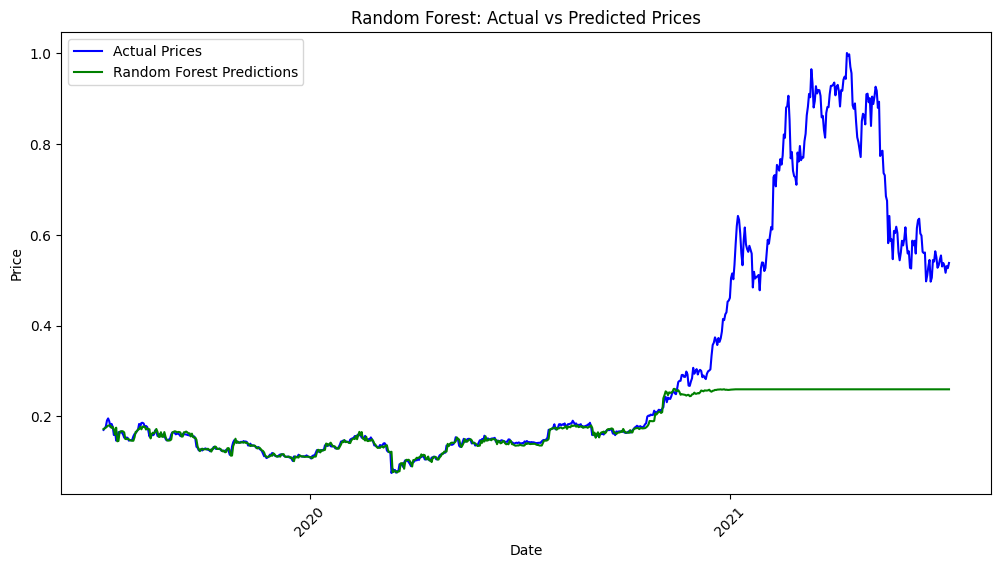

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(sorted_rf_data.index, sorted_rf_data['Actual'], label='Actual Prices', color='blue')
ax.plot(sorted_rf_data.index, sorted_rf_data['Predictions'], label='Random Forest Predictions', color='green')
ax.set_title('Random Forest: Actual vs Predicted Prices')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.show()

In [ ]:
X_dt, y_dt = create_lagged_features(scaled_data, look_back=30)

X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.3, shuffle=False)


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Define the Decision Tree model
model_dt = DecisionTreeRegressor()

# Train the model
model_dt.fit(X_train_dt, y_train_dt)


DecisionTreeRegressor()

In [ ]:
# Make predictions
dt_predictions = model_dt.predict(X_test_dt)

# Inverse scale the predictions
dt_predictions = scaler.inverse_transform(dt_predictions.reshape(-1, 1))

# Calculate the accuracy
dt_mse = mean_squared_error(y_test_dt, dt_predictions)
dt_rmse = np.sqrt(dt_mse)
dt_mae = mean_absolute_error(y_test_dt, dt_predictions)
dt_r2 = r2_score(y_test_dt,dt_predictions)
print(f"Decision Tree Model MSE: {dt_mse}")
print(f"Decision tree Model RMSE: {dt_rmse}")
print(f"Decision tree Model MAE: {dt_mae}")
print(f"Decision tree Model R-squared: {dt_r2}")


Decision Tree Model MSE: 144626400.9194832
Decision tree Model RMSE: 12026.071716046068
Decision tree Model MAE: 11505.882203534245
Decision tree Model R-squared: -2153616508.9624667


In [ ]:
# Extract the actual prices from the test dataset
y_test_dt_actual = scaler.inverse_transform(y_test_dt.reshape(-1, 1))

# Adjust the length of dates_test
dates_test_dt = dataset.index[-len(y_test_dt_actual):]

# Create a DataFrame with the dates_test_dt and the actual prices
sorted_dt_data = pd.DataFrame({'Date': dates_test_dt, 'Actual': y_test_dt_actual.flatten()})
sorted_dt_data.set_index('Date', inplace=True)
sorted_dt_data.sort_index(inplace=True)
# Extract the actual prices from the test dataset

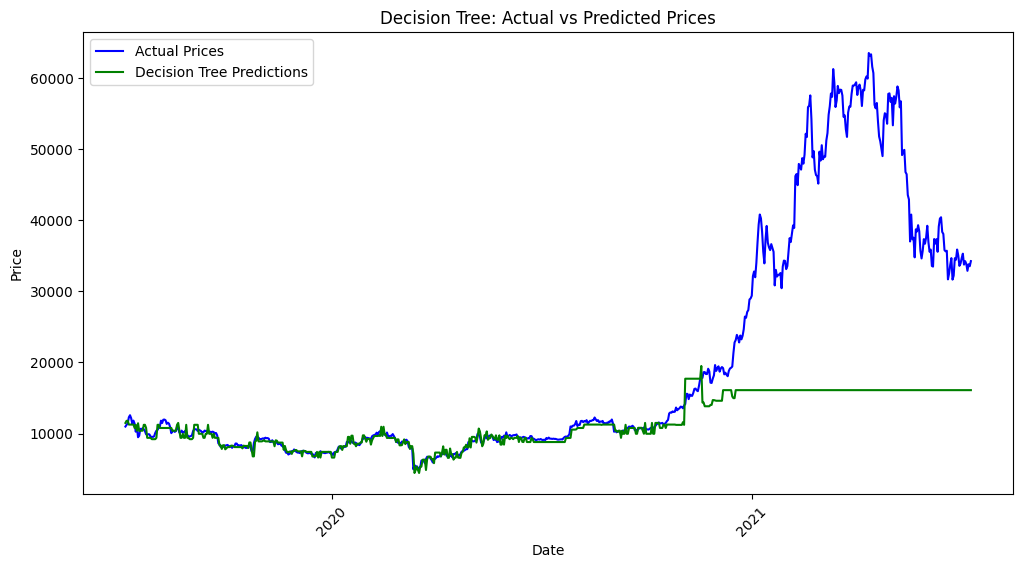

In [ ]:

fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(x=sorted_dt_data.index, y=sorted_dt_data['Actual'], label='Actual Prices', color='blue', ax=ax)
sns.lineplot(x=dates_test_dt, y=dt_predictions.flatten(), label='Decision Tree Predictions', color='green', ax=ax)

ax.set_title('Decision Tree: Actual vs Predicted Prices')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.show()



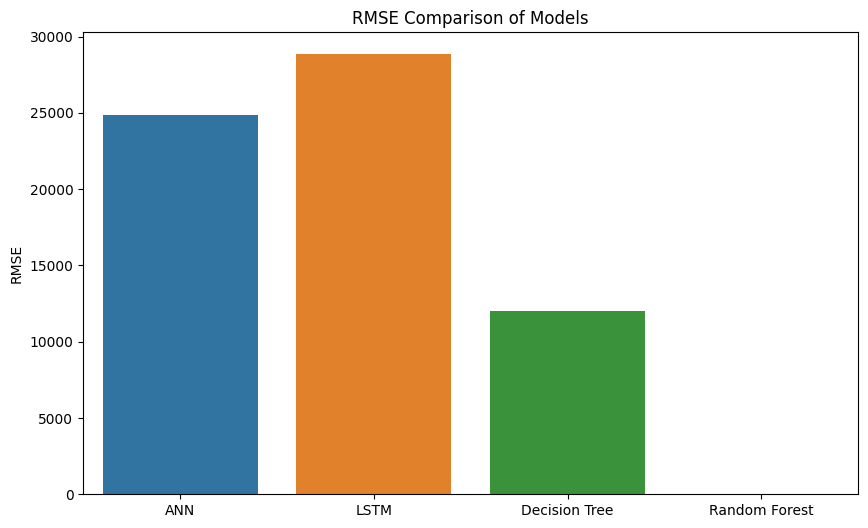

In [ ]:
# Store the model names and RMSE values in lists
models = ['ANN', 'LSTM', 'Decision Tree','Random Forest']
rmse_values = [ann_rmse, lstm_rmse, dt_rmse, rf_rmse]

# Plot the RMSE values for the models
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=rmse_values)
plt.ylabel('RMSE')
plt.title('RMSE Comparison of Models')

plt.show()


In [ ]:
%%shell
jupyter nbconvert --to html /content/dissertation.ipynb

[NbConvertApp] Converting notebook /content/dissertation.ipynb to html
[NbConvertApp] Writing 1319245 bytes to /content/dissertation.html
